In [102]:
#importing libraries and modules needed
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import plotly.plotly as py
from plotly import tools
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode
import plotly.tools as tls
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF
%matplotlib inline
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns
import math
import scipy

In [91]:
#Reading the dataset using pandas package
scores=pd.read_csv("personality_scored_answers_anonymised.csv")
print(scores)

                                                                                                                                                                                                                                                                                                        Column1;Part 1 : Opposing Descriptions [Accepts things as they are | Unsatisfied with the way things are];Part 1 : Opposing Descriptions [Bases morality on justice | Bases morality on compassion];Part 1 : Opposing Descriptions [Bored by time alone | Needs time alone];Part 1 : Opposing Descriptions [Chaotic | Organized];Part 1 : Opposing Descriptions [Easily hurt | Thick-skinned];Part 1 : Opposing Descriptions [Energetic | Mellow];Part 1 : Opposing Descriptions [Finds it difficult to yell very loudly |  Yelling to others when they are far away comes naturally];Part 1 : Opposing Descriptions [Fits in | Stands out];Part 1 : Opposing Descriptions [Focused on the present | Focused on the future];Part

In [92]:
#Reading the dataset using pandas package
#making dataframe 
scores=pd.read_csv("personality_scored_answers_anonymised.csv", delimiter= ";")
scores.head()

#Calling describe method 
#Viewing some basic statistical details
scores.describe() 

,Column1,Part 1 : Opposing Descriptions [Accepts things as they are | Unsatisfied with the way things are],Part 1 : Opposing Descriptions [Bases morality on justice | Bases morality on compassion],Part 1 : Opposing Descriptions [Bored by time alone | Needs time alone],Part 1 : Opposing Descriptions [Chaotic | Organized],Part 1 : Opposing Descriptions [Easily hurt | Thick-skinned],Part 1 : Opposing Descriptions [Energetic | Mellow],Part 1 : Opposing Descriptions [Finds it difficult to yell very loudly | Yelling to others when they are far away comes naturally],Part 1 : Opposing Descriptions [Fits in | Stands out],Part 1 : Opposing Descriptions [Focused on the present | Focused on the future],...,TEQ,BRS,DGS,BARON_COHEN,IPIP_Extraversion,IPIP_Agreeableness,IPIP_Conscientiousness,IPIP_Emotional Stability/Neuroticism,IPIP_Intellect/Imagination / openness to experiences,IPIP_HIGH_RISK
count,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000,...,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000,0.0
mean,777.000000,3.147910,3.231511,3.354341,3.560129,3.241801,3.034727,2.675241,3.335048,3.655949,...,48.630868,3.644051,4.010289,12.274598,30.852733,42.180064,42.149196,36.118328,40.086174,NaN
std,449.034149,1.300426,1.192711,1.284939,1.224778,1.318877,1.397765,1.371947,1.221967,1.148815,...,6.762096,0.577727,0.566376,3.864479,8.076902,5.346042,5.924742,7.025337,5.469963,NaN
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,25.000000,1.666667,1.400000,1.000000,10.000000,22.000000,16.000000,12.000000,20.000000,NaN
25%,388.500000,2.000000,3.000000,3.000000,3.000000,2.000000,2.000000,1.000000,3.000000,3.000000,...,44.000000,3.333333,3.700000,9.000000,26.000000,38.000000,38.000000,32.000000,36.000000,NaN
50%,777.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,...,49.000000,3.666667,4.100000,13.000000,30.000000,42.000000,44.000000,38.000000,40.000000,NaN
75%,1165.500000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,5.000000,...,54.000000,4.000000,4.400000,15.000000,36.000000,46.000000,46.000000,42.000000,44.000000,NaN
max,1554.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,64.000000,5.000000,5.000000,20.000000,50.000000,50.000000,50.000000,50.000000,50.000000,NaN


In [93]:
#Obtaining all the column names of the dataframe
print(scores.columns.values)

#Display of only the columns needed 
scores1=scores[['TEQ', 'BRS', 'DGS', 'BARON_COHEN', 'IPIP_Extraversion', 'IPIP_Agreeableness', 'IPIP_Conscientiousness',
 'IPIP_Emotional Stability/Neuroticism', 'IPIP_Intellect/Imagination / openness to experiences']]
print(scores1)

['Column1'
 'Part 1 : Opposing Descriptions [Accepts things as they are | Unsatisfied with the way things are]'
 'Part 1 : Opposing Descriptions [Bases morality on justice | Bases morality on compassion]'
 'Part 1 : Opposing Descriptions [Bored by time alone | Needs time alone]'
 'Part 1 : Opposing Descriptions [Chaotic | Organized]'
 'Part 1 : Opposing Descriptions [Easily hurt | Thick-skinned]'
 'Part 1 : Opposing Descriptions [Energetic | Mellow]'
 'Part 1 : Opposing Descriptions [Finds it difficult to yell very loudly |  Yelling to others when they are far away comes naturally]'
 'Part 1 : Opposing Descriptions [Fits in | Stands out]'
 'Part 1 : Opposing Descriptions [Focused on the present | Focused on the future]'
 'Part 1 : Opposing Descriptions [Follows the heart | Follows the head]'
 'Part 1 : Opposing Descriptions [Gets work done right away | Procrastinates]'
 'Part 1 : Opposing Descriptions [Gets worn out by parties | Gets fired up by parties]'
 'Part 1 : Opposing Descriptio

In [94]:
#Calling describe method
#View statistical details for the specific columns needed
scores1.describe()

,TEQ,BRS,DGS,BARON_COHEN,IPIP_Extraversion,IPIP_Agreeableness,IPIP_Conscientiousness,IPIP_Emotional Stability/Neuroticism,IPIP_Intellect/Imagination / openness to experiences
count,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000
mean,48.630868,3.644051,4.010289,12.274598,30.852733,42.180064,42.149196,36.118328,40.086174
std,6.762096,0.577727,0.566376,3.864479,8.076902,5.346042,5.924742,7.025337,5.469963
min,25.000000,1.666667,1.400000,1.000000,10.000000,22.000000,16.000000,12.000000,20.000000
25%,44.000000,3.333333,3.700000,9.000000,26.000000,38.000000,38.000000,32.000000,36.000000
50%,49.000000,3.666667,4.100000,13.000000,30.000000,42.000000,44.000000,38.000000,40.000000
75%,54.000000,4.000000,4.400000,15.000000,36.000000,46.000000,46.000000,42.000000,44.000000
max,64.000000,5.000000,5.000000,20.000000,50.000000,50.000000,50.000000,50.000000,50.000000


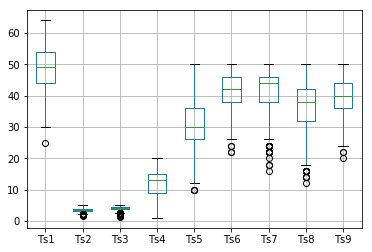

In [95]:
scores1.columns=['Ts1', 'Ts2', 'Ts3', 'Ts4', 'Ts5','Ts6', 'Ts7','Ts8', 'Ts9']
scores1.plot.box(grid=True)

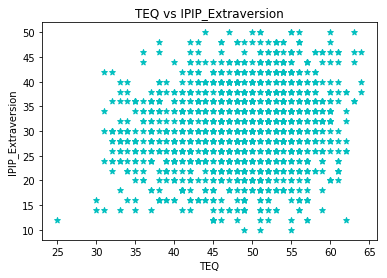

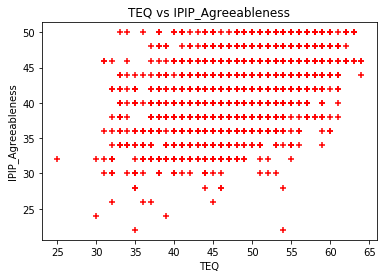

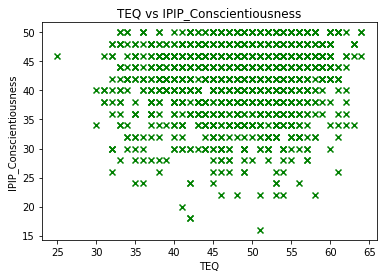

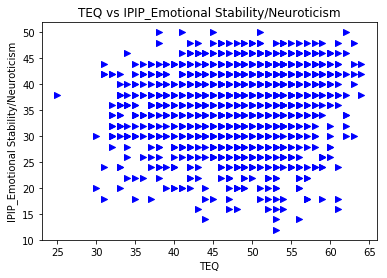

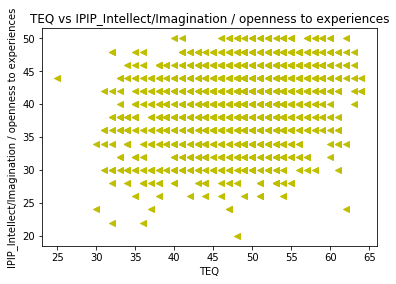

In [96]:
###### this graph shows the relationship between TEQ test and IPIP-five factors test

plt.figure(1)

plt.scatter(scores1['Ts1'], scores1['Ts5'], color='c', marker='*')
plt.title('TEQ vs IPIP_Extraversion')
plt.xlabel('TEQ')
plt.ylabel('IPIP_Extraversion')
plt.show()

plt.scatter(scores1['Ts1'], scores1['Ts6'],color='r',marker='+')
plt.title('TEQ vs IPIP_Agreeableness')
plt.xlabel('TEQ')
plt.ylabel('IPIP_Agreeableness')
plt.show()

plt.scatter(scores1['Ts1'], scores1['Ts7'],color='g', marker='x')
plt.title('TEQ vs IPIP_Conscientiousness')
plt.xlabel('TEQ')
plt.ylabel('IPIP_Conscientiousness')
plt.show()

plt.scatter(scores1['Ts1'], scores1['Ts8'],color='b', marker='>')
plt.title('TEQ vs IPIP_Emotional Stability/Neuroticism')
plt.xlabel('TEQ')
plt.ylabel('IPIP_Emotional Stability/Neuroticism')
plt.show()

plt.scatter(scores1['Ts1'], scores1['Ts9'],color='y', marker='<')
plt.title('TEQ vs IPIP_Intellect/Imagination / openness to experiences')
plt.xlabel('TEQ')
plt.ylabel('IPIP_Intellect/Imagination / openness to experiences')
plt.show()


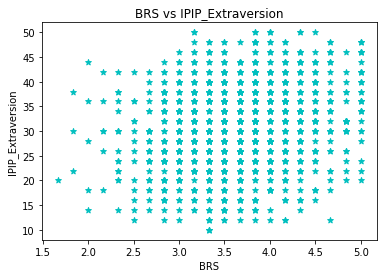

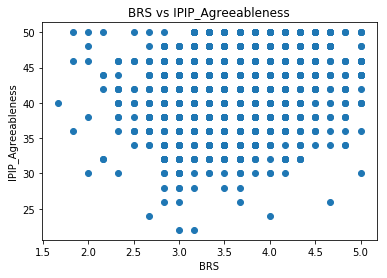

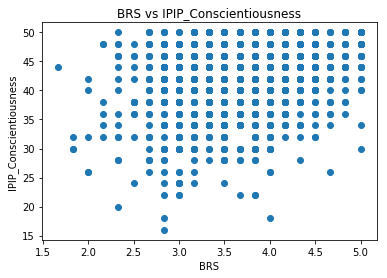

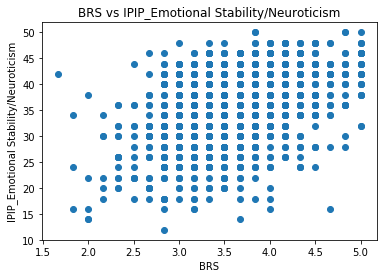

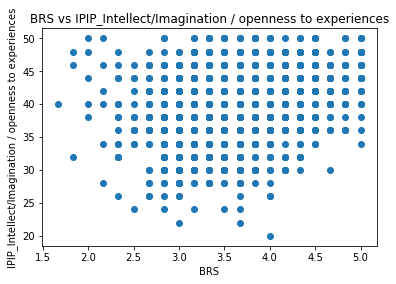

In [97]:
#this graph shows the relationship between BRS test and IPIP-five factors test

plt.figure(1)

plt.scatter(scores1['Ts2'], scores1['Ts5'], color='c', marker='*')
plt.title('BRS vs IPIP_Extraversion')
plt.xlabel('BRS')
plt.ylabel('IPIP_Extraversion')
plt.show()

plt.scatter(scores1['Ts2'], scores1['Ts6'])
plt.title('BRS vs IPIP_Agreeableness')
plt.xlabel('BRS')
plt.ylabel('IPIP_Agreeableness')
plt.show()

plt.scatter(scores1['Ts2'], scores1['Ts7'])
plt.title('BRS vs IPIP_Conscientiousness')
plt.xlabel('BRS')
plt.ylabel('IPIP_Conscientiousness')
plt.show()

plt.scatter(scores1['Ts2'], scores1['Ts8'])
plt.title('BRS vs IPIP_Emotional Stability/Neuroticism')
plt.xlabel('BRS')
plt.ylabel('IPIP_Emotional Stability/Neuroticism')
plt.show()

plt.scatter(scores1['Ts2'], scores1['Ts9'])
plt.title('BRS vs IPIP_Intellect/Imagination / openness to experiences')
plt.xlabel('BRS')
plt.ylabel('IPIP_Intellect/Imagination / openness to experiences')
plt.show()


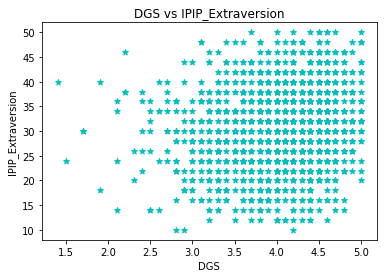

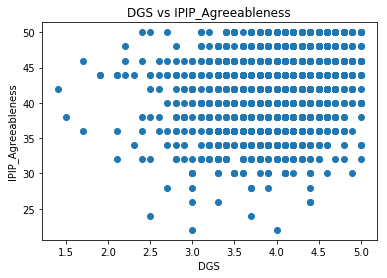

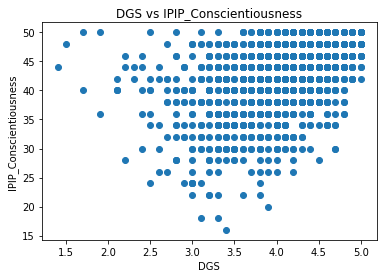

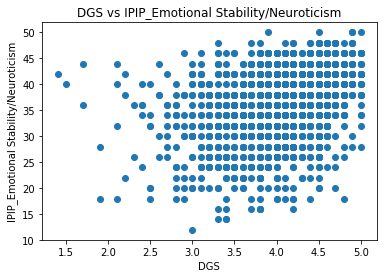

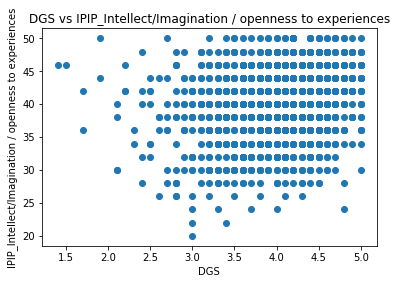

In [98]:
#this graph shows the relationship between DGS test and IPIP-five factors test

plt.figure(1)

plt.scatter(scores1['Ts3'], scores1['Ts5'], color='c', marker='*')
plt.title('DGS vs IPIP_Extraversion')
plt.xlabel('DGS')
plt.ylabel('IPIP_Extraversion')
plt.show()


plt.scatter(scores1['Ts3'], scores1['Ts6'])
plt.title('DGS vs IPIP_Agreeableness')
plt.xlabel('DGS')
plt.ylabel('IPIP_Agreeableness')
plt.show()


plt.scatter(scores1['Ts3'], scores1['Ts7'])
plt.title('DGS vs IPIP_Conscientiousness')
plt.xlabel('DGS')
plt.ylabel('IPIP_Conscientiousness')
plt.show()


plt.scatter(scores1['Ts3'], scores1['Ts8'])
plt.title('DGS vs IPIP_Emotional Stability/Neuroticism')
plt.xlabel('DGS')
plt.ylabel('IPIP_Emotional Stability/Neuroticism')
plt.show()


plt.scatter(scores1['Ts3'], scores1['Ts9'])
plt.title('DGS vs IPIP_Intellect/Imagination / openness to experiences')
plt.xlabel('DGS')
plt.ylabel('IPIP_Intellect/Imagination / openness to experiences')
plt.show()


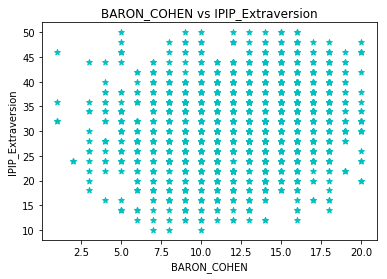

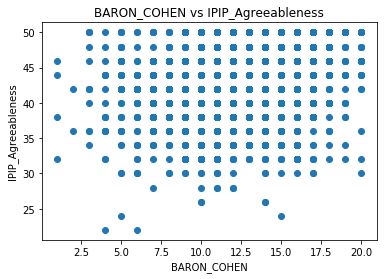

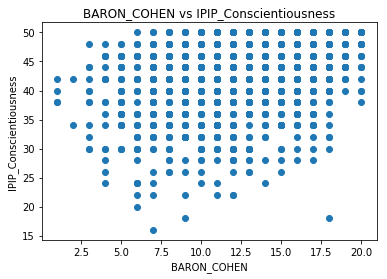

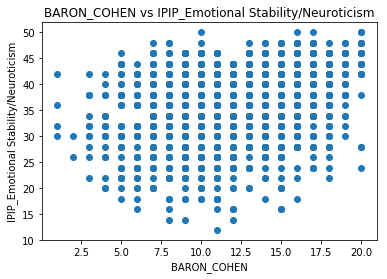

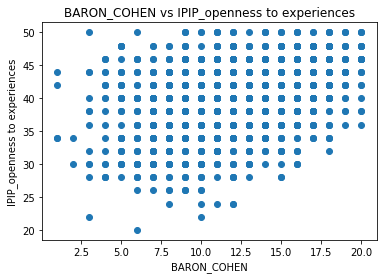

In [99]:
#this graph shows the relationship between BARON-COHEN test and IPIP-five factors test

plt.figure(1)

plt.scatter(scores1['Ts4'], scores1['Ts5'], color='c', marker='*')
plt.title('BARON_COHEN vs IPIP_Extraversion')
plt.xlabel('BARON_COHEN')
plt.ylabel('IPIP_Extraversion')
plt.show()

plt.scatter(scores1['Ts4'], scores1['Ts6'])
plt.title('BARON_COHEN vs IPIP_Agreeableness')
plt.xlabel('BARON_COHEN')
plt.ylabel('IPIP_Agreeableness')
plt.show()

plt.scatter(scores1['Ts4'], scores1['Ts7'])
plt.title('BARON_COHEN vs IPIP_Conscientiousness')
plt.xlabel('BARON_COHEN')
plt.ylabel('IPIP_Conscientiousness')
plt.show()

plt.scatter(scores1['Ts4'], scores1['Ts8'])
plt.title('BARON_COHEN vs IPIP_Emotional Stability/Neuroticism')
plt.xlabel('BARON_COHEN')
plt.ylabel('IPIP_Emotional Stability/Neuroticism')
plt.show()

plt.scatter(scores1['Ts4'], scores1['Ts9'])
plt.title('BARON_COHEN vs IPIP_openness to experiences')
plt.xlabel('BARON_COHEN')
plt.ylabel('IPIP_openness to experiences')
plt.show()


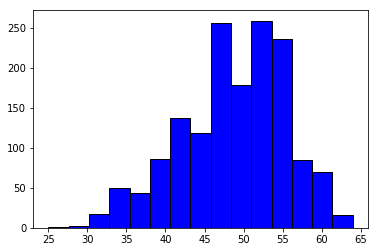

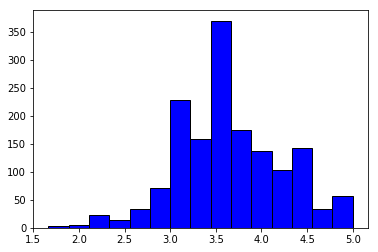

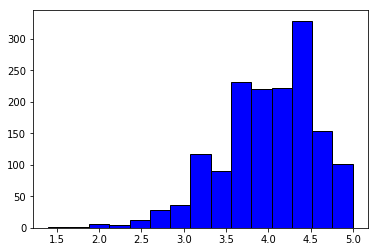

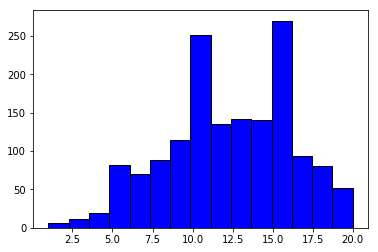

In [100]:
#

plt.figure(1)
plt.subplot(111)
plt.hist(scores1['Ts1'],bins=15, color = 'blue', edgecolor = 'black')
plt.show()

plt.subplot(111)
plt.hist(scores1['Ts2'],bins=15, color = 'blue', edgecolor = 'black')
plt.show()

plt.subplot(111)
plt.hist(scores1['Ts3'],bins=15, color = 'blue', edgecolor = 'black')
plt.show()

plt.subplot(111)
plt.hist(scores1['Ts4'],bins=15, color = 'blue', edgecolor = 'black')
plt.show()

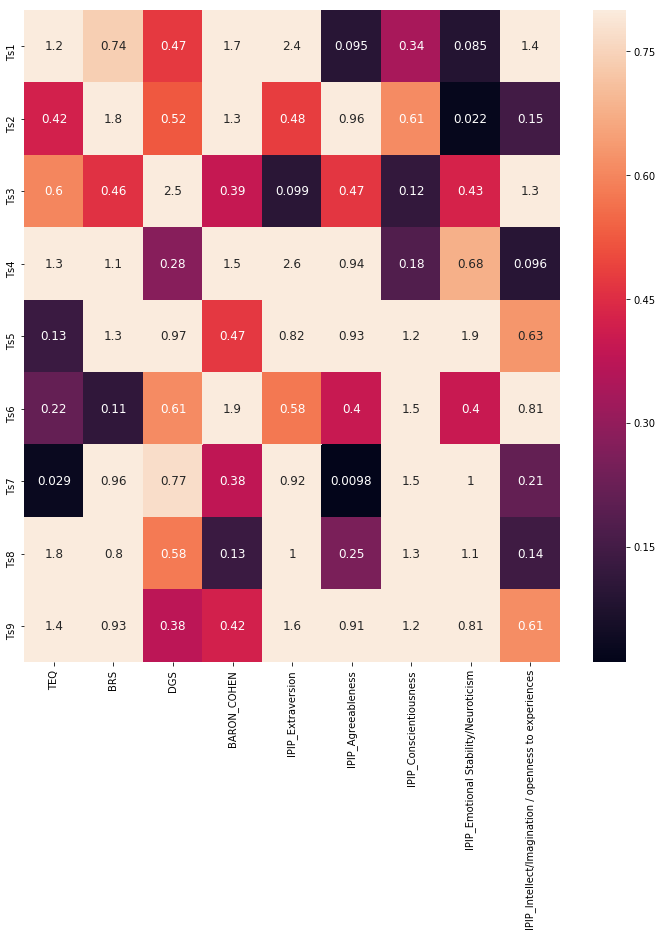

In [112]:
plt.figure(figsize=(12,12))

Index= ['Ts1', 'Ts2', 'Ts3', 'Ts4', 'Ts5','Ts6', 'Ts7','Ts8', 'Ts9']
Cols = ['TEQ', 'BRS', 'DGS', 'BARON_COHEN', 'IPIP_Extraversion', 'IPIP_Agreeableness', 'IPIP_Conscientiousness',
 'IPIP_Emotional Stability/Neuroticism', 'IPIP_Intellect/Imagination / openness to experiences']
df = DataFrame(abs(np.random.randn(9, 9)), index= Index, columns= Cols)

sns.heatmap(df,vmax=.8, annot=True, annot_kws={'size':12})